In [1]:
!pip install selenium

[QUESTION - 1]. 

Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [2]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [3]:
driver = webdriver.Chrome()

In [4]:
driver.get('https://www.amazon.in/')

In [5]:
inputP = input('please enter product here--->')

please enter product here--->LAPTOPS


In [6]:
search_bar = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_bar.send_keys(inputP)

In [7]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

In [8]:
product_name=[]

In [9]:
name=driver.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')
for i in name:
    if i.text is None:
        product_name.append("__")
    else:
        product_name.append(i.text)

In [10]:
print(len(product_name))

24


In [11]:
import pandas as pd
df=pd.DataFrame({"BRAND NAME": product_name})

In [12]:
df

,BRAND NAME
0,"Dell 15 Laptop, Intel Core i3-1115G4 Processor..."
1,Lenovo IdeaPad Gaming 3 Laptop Intel Core i5 1...
2,"HP Laptop 15s, AMD Ryzen 5 5500U, 15.6-inch (3..."
3,"HP Laptop 15s, 12th Gen Intel Core i3-1215U, 1..."
4,"HP 255 G8 Notebook PC,AMD Ryzen 3 3250U, 15.6 ..."
5,"Dell [SmartChoice 14 Laptop, 12th Gen Intel Co..."
6,(Refurbished) Lenovo ThinkPad 5th Gen Intel Co...
7,"ASUS [SmartChoice] Vivobook 15, Intel Celeron ..."
8,"Lenovo IdeaPad 1 AMD Athlon Silver 7120U 15.6""..."
9,(Refurbished) HP Chromebook x360 8th Gen Intel...


[QUESTION - 2]. 

In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand  Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and  “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [10]:
brand_name=[]
name=driver.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')
for i in name:
    if i.text is None:
        brand_name.append("--")
    else:
        brand_name.append(i.text)

In [15]:
price_value=[]
value=driver.find_elements(By.XPATH,'//span[@class="a-price"]')
for i in value:
    if i.text is None:
        price_value.append("--")
    else:
        price_value.append(i.text)

In [18]:
expected_delivery=[]
delivery=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
for i in delivery:
    if i.text is None:
        expected_delivery.append("--")
    else:
        expected_delivery.append(i.text)

In [20]:
brand_name,price_value,expected_delivery

(['Dell 15 Laptop, Intel Core i3-1115G4 Processor/8GB DDR4/512GB SSD/Intel UHD Graphics/15.6" (39.6cm) FHD 120Hz Refresh, 250 nits/Mobile Connect/Win 11+MSO\'21/15 Month McAfee/Black/Thin & Light-1.66kg',
  'Samsung Galaxy Book3 Pro Intel 13th Gen i7 EvoTM 40.62cm(16") Dynamic Amoled 2X, 3K Display, 120Hz, Ultra Thin & Light Laptop(16 GB/512 GB SSD/Windows 11/MS Office/Graphite/1.56Kg), NP960XFG-KC1IN',
  '(Refurbished) Lenovo ThinkPad 5th Gen Intel Core i5 Thin & Light HD Laptop (16 GB RAM/256 GB SSD/14" (35.6 cm) HD/Windows 10 Pro/MS Office/WiFi/Bluetooth/Webcam/Intel Graphics), Black',
  'HP Laptop 15s, 12th Gen Intel Core i3-1215U, 15.6-inch (39.6 cm), FHD, 8GB DDR4, 512GB SSD, Intel UHD Graphics, Backlit KB, Thin & Light, Dual Speakers (Win 11, MSO 2021, Silver, 1.69 kg), fq5007TU',
  'HP Laptop 15s, AMD Ryzen 5 5500U, 15.6-inch (39.6 cm), FHD, 8GB DDR4, 512GB SSD, AMD Radeon Graphics, Thin & Light, Dual Speakers (Win 11, MSO 2019, Silver, 1.69 kg), eq2144AU',
  'Dell [SmartChoice

[QUESTION - 3]. 

Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [20]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [21]:
driver = webdriver.Chrome()

In [22]:
driver.get('https://images.google.com/')

In [23]:
keywords = ['fruits','cars','Machine Learning','Guitar','Cakes']

In [24]:
search_bar = driver.find_element(By.NAME,'q')
search_bar.send_keys(keywords)

In [25]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search_button.click()  

In [26]:
print("start scrolling to generate more images on the page...")
# 500 time we scroll down by 10000 in order to generate more images on the website
for _ in range(500):
    driver.execute_script("window.scrollBy(0,10000)")

start scrolling to generate more images on the page...


In [27]:
images = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')

In [32]:
img_urls = []
img_data = []
for image in images:
    source= image.get_attribute('src')
    img_urls.append(source)
len(img_urls)

22

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvUunwQihXe14PNv_q8ahezvNaJ2Oh1U251g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSN0YV3EJePmjBHeOhZS3fxKGs_Z_4g8NhRPw&usqp=CAU']
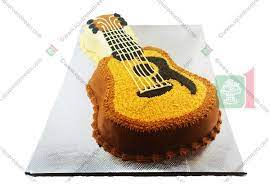
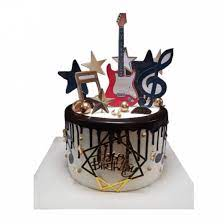
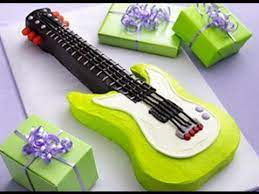
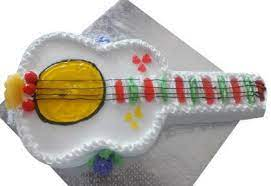
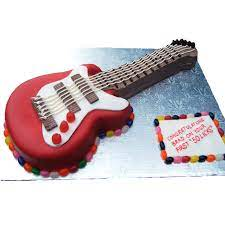
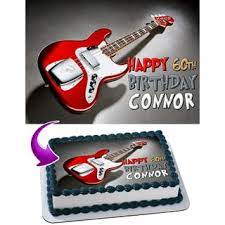
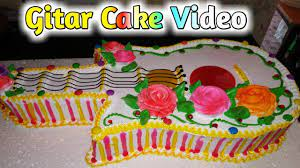
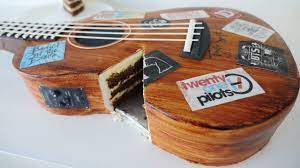
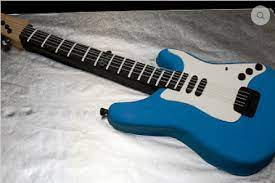
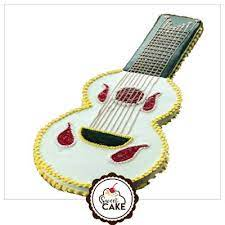
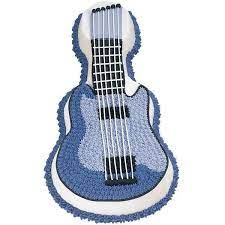
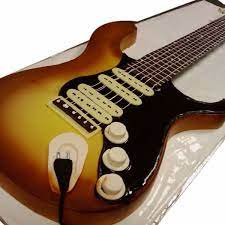
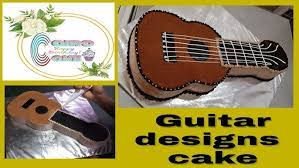
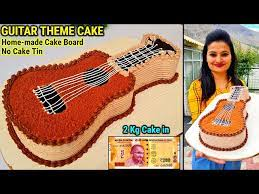
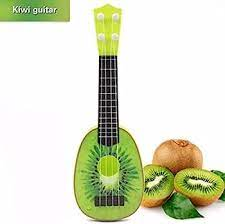
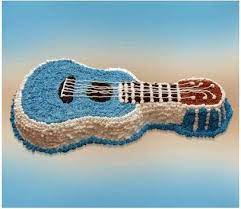
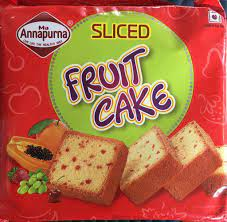
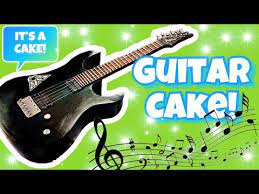
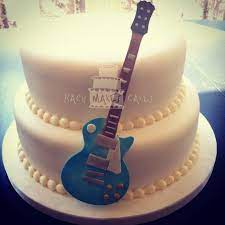
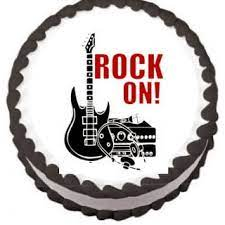

In [44]:
img_urls

In [48]:
for i in range(len(img_urls)):
    if i >= 100:
        break
    print("Downloading {0} of {1} images" .format(i, 10))

[QUESTION - 4]. 

Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,  “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [1]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [2]:
driver=webdriver.Chrome()

In [3]:
driver.get('https://www.flipkart.com/')

In [4]:
search_bar=driver.find_element(By.CLASS_NAME,'Pke_EE')
search_bar.send_keys('smartphone')

In [5]:
search_button=driver.find_element(By.CLASS_NAME,'_2iLD__')
search_button.click()

In [6]:
brand_name=[]
colour=[]
storage_capacity=[]
p_s_camera=[]
display_size=[]
battery=[]
price_value=[]

In [8]:
name=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
for i in name:
    if i.text is None :
        brand_name.append("--") 
    else:
        brand_name.append(i.text)

In [9]:
capacity=driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]/li[1]')
for i in capacity:
    if i.text is None :
        storage_capacity.append("--") 
    else:
        storage_capacity.append(i.text)

In [10]:
camera=driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]//li[3]')
for i in camera:
    if i.text is None :
        p_s_camera.append("--") 
    else:
        p_s_camera.append(i.text)

In [11]:
size=driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]//li[2]')
for i in size:
    if i.text is None :
        display_size.append("--") 
    else:
        display_size.append(i.text)

In [12]:
value=driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
for i in value:
    if i.text is None :
        price_value.append("--") 
    else:
        price_value.append(i.text)

In [14]:
print(len(brand_name),len(price_value),len(p_s_camera),len(display_size),len(storage_capacity))

24 24 24 24 24


In [17]:
df=pd.DataFrame({'Brand': brand_name, 'Storage': storage_capacity, 'Display': display_size, 'Camera': p_s_camera, 'Price': price_value})

In [18]:
df

,Brand,Storage,Display,Camera,Price
0,"APPLE iPhone 14 (Blue, 128 GB)",128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,"₹60,999"
1,"APPLE iPhone 14 (Midnight, 128 GB)",128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,"₹62,999"
2,"APPLE iPhone 14 (Starlight, 128 GB)",128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,"₹61,999"
3,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP | 13MP Front Camera,"₹12,490"
4,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP | 13MP Front Camera,"₹12,490"
5,"APPLE iPhone 14 (Purple, 128 GB)",128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,"₹61,999"
6,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)",6 GB RAM | 128 GB ROM,16.74 cm (6.59 inch) Display,64MP Rear Camera | 16MP Front Camera,"₹17,020"
7,"POCO C51 (Royal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,"₹5,999"
8,"POCO C55 (Cool Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,"₹8,499"
9,"POCO C55 (Forest Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,"₹7,499"


[QUESTION - 5]. 

Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [11]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
import re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [12]:
driver = webdriver.Chrome()

In [13]:
driver.get("https://www.google.co.in/maps")
time.sleep(3)

In [14]:
city = input('Enter City Name : ')

Enter City Name : Patna


In [15]:
search = driver.find_element(By.CLASS_NAME,'searchboxinput.xiQnY')
search.clear()
time.sleep(2)

In [16]:
search.send_keys(city)
button = driver.find_element(By.ID,"searchbox-searchbutton")
button.click()
time.sleep(3)

In [17]:
try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

URL Extracted:  https://www.google.co.in/maps/place/Patna,+Bihar/@25.6080374,85.1430429,11z/data=!3m1!4b1!4m6!3m5!1s0x39f29937c52d4f05:0x831a0e05f607b270!8m2!3d25.5940947!4d85.1375645!16zL20vMDI3d3Zi?entry=ttu
Latitude = 25.6080374, Longitude = 85.1430429


[QUESTION - 6]. 

Write a program to scrap all the available details of best gaming laptops from digit.in.

In [1]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
import requests as re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")

In [4]:
brand_name=[]
name=driver.find_elements(By.XPATH,'//div[@class="rh_gr_top_middle mb10 colored_rate_bar"]')
for i in name:
    brand_name.append(i.text)

In [5]:
len(brand_name)

7

In [6]:
brand_name

['HP Omen 17-ck2008TX 13th Gen Core i7-13700HX',
 'MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12900HX',
 'Lenovo Legion 5i Pro 12th Gen Core i7-12700H (82RF00E1IN)',
 'ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen Core i9-13980HX',
 'Acer Predator Helios Neo 16 13th Gen Core i7-13700HX (PHN16-71)',
 'ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ-L4136WS)',
 'MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-205IN)']

In [7]:
specification_details=[]
details=driver.find_elements(By.XPATH,'//div[@class="rh_gr_middle_desc"]')
for i in details:
    specification_details.append(str(i.text).replace("\n",""))

In [8]:
len(specification_details)

7

In [9]:
specification_details

['Operating System:Windows 11 HomeDisplay Size :17.3Resolution :2560 x 1440Processor :13th Gen Intel Core i7-13700HX',
 '',
 'Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :12th Gen Intel Core i7-12700H',
 '',
 'Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :13th Gen Intel Core i7-13700HX',
 '',
 '']

In [19]:
price_value=[]
value=driver.find_elements(By.XPATH,'//div[@class="cegg-price cegg-price-color cegg-price-instock"]')
for i in value:
    price_value.append(str(i.text).replace("\n",""))

In [20]:
price_value

['Rs. 259,499',
 'Rs. 154,990',
 'Rs. 139,990',
 'Rs. 118,700',
 'Rs. 12,999',
 'Rs. 14,990',
 'Rs. 49,999',
 'Rs. 99,900']

In [22]:
brand_name,specification_details,price_value

(['HP Omen 17-ck2008TX 13th Gen Core i7-13700HX',
  'MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12900HX',
  'Lenovo Legion 5i Pro 12th Gen Core i7-12700H (82RF00E1IN)',
  'ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen Core i9-13980HX',
  'Acer Predator Helios Neo 16 13th Gen Core i7-13700HX (PHN16-71)',
  'ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ-L4136WS)',
  'MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-205IN)'],
 ['Operating System:Windows 11 HomeDisplay Size :17.3Resolution :2560 x 1440Processor :13th Gen Intel Core i7-13700HX',
  '',
  'Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :12th Gen Intel Core i7-12700H',
  '',
  'Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :13th Gen Intel Core i7-13700HX',
  '',
  ''],
 ['Rs. 259,499',
  'Rs. 154,990',
  'Rs. 139,990',
  'Rs. 118,700',
  'Rs. 12,999',
  'Rs. 14,990',
  'Rs. 49,999',
  'Rs. 99,900'])

[QUESTION - 7]. 

Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [1]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
import requests as re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://www.forbes.com/billionaires/")

In [4]:
rank_number=[]
number=driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
for i in number:
    rank_number.append(i.text)

In [5]:
len(rank_number)

200

In [6]:
rank_number

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [7]:
net_worth=[]
worth=driver.find_elements(By.XPATH,'//div[@class="Table_netWorth___L4R5 Table_dataCell__2QCve"]')
for i in worth:
    net_worth.append(i.text)

In [8]:
len(net_worth)

200

In [9]:
net_worth

['$211 B',
 '$180 B',
 '$114 B',
 '$107 B',
 '$106 B',
 '$104 B',
 '$94.5 B',
 '$93 B',
 '$83.4 B',
 '$80.7 B',
 '$80.5 B',
 '$79.2 B',
 '$77.3 B',
 '$76 B',
 '$68 B',
 '$64.4 B',
 '$59 B',
 '$59 B',
 '$58.8 B',
 '$57.6 B',
 '$56.7 B',
 '$54.4 B',
 '$50.1 B',
 '$47.2 B',
 '$45.1 B',
 '$45 B',
 '$42.9 B',
 '$40.1 B',
 '$39.1 B',
 '$38.9 B',
 '$38.3 B',
 '$38.3 B',
 '$38 B',
 '$35.3 B',
 '$35 B',
 '$35 B',
 '$34.7 B',
 '$33.4 B',
 '$32.6 B',
 '$32.1 B',
 '$31.6 B',
 '$31.6 B',
 '$31.2 B',
 '$31.2 B',
 '$30.2 B',
 '$29.7 B',
 '$29.5 B',
 '$28.5 B',
 '$28.1 B',
 '$27.8 B',
 '$27.4 B',
 '$27 B',
 '$26.7 B',
 '$26.6 B',
 '$25.6 B',
 '$25.5 B',
 '$25.3 B',
 '$25.2 B',
 '$24.6 B',
 '$24.4 B',
 '$24.2 B',
 '$23.7 B',
 '$23.5 B',
 '$23.4 B',
 '$23.1 B',
 '$23.1 B',
 '$22.9 B',
 '$22.6 B',
 '$22.4 B',
 '$22.1 B',
 '$22 B',
 '$21.6 B',
 '$21.6 B',
 '$21.2 B',
 '$21.2 B',
 '$21.1 B',
 '$21 B',
 '$21 B',
 '$20.9 B',
 '$20.5 B',
 '$20.2 B',
 '$19.6 B',
 '$19.1 B',
 '$19 B',
 '$19 B',
 '$18.9 B',
 '$1

In [12]:
name_person=[]
person=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][2]')
for i in person:
    name_person.append(i.text)

In [13]:
len(name_person)

200

In [14]:
name_person

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch & family',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton & family',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simon

In [15]:
age_count=[]
count=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][4]')
for i in count:
    age_count.append(i.text)

In [16]:
len(age_count)

200

In [17]:
age_count

['74',
 '51',
 '59',
 '78',
 '92',
 '67',
 '81',
 '83',
 '65',
 '67',
 '69',
 '50',
 '87',
 '49',
 '68',
 '38',
 '87',
 '60',
 '74',
 '78',
 '73',
 '65',
 '58',
 '60',
 '85',
 '39',
 '83',
 '86',
 '85',
 '58',
 '83',
 '87',
 '94',
 '51',
 '77',
 '54',
 '30',
 '54',
 '74',
 '65',
 '74',
 '72',
 '82',
 '78',
 '43',
 '87',
 '95',
 '64',
 '84',
 '76',
 '60',
 '69',
 '51',
 '69',
 '77',
 '74',
 '78',
 '51',
 '56',
 '52',
 '82',
 '62',
 '58',
 '80',
 '80',
 '83',
 '70',
 '81',
 '65',
 '66',
 '52',
 '61',
 '67',
 '36',
 '52',
 '60',
 '90',
 '77',
 '57',
 '72',
 '84',
 '61',
 '73',
 '59',
 '55',
 '72',
 '57',
 '57',
 '77',
 '65',
 '70',
 '61',
 '72',
 '66',
 '87',
 '73',
 '90',
 '83',
 '92',
 '70',
 '72',
 '55',
 '72',
 '75',
 '67',
 '55',
 '67',
 'N/A',
 'N/A',
 '83',
 '76',
 '67',
 '45',
 '68',
 '56',
 '83',
 '81',
 '78',
 '68',
 '60',
 '59',
 '69',
 '95',
 '55',
 '65',
 '93',
 '67',
 '57',
 '94',
 '78',
 '76',
 '47',
 '80',
 '80',
 '71',
 '60',
 '90',
 '64',
 '75',
 '58',
 '57',
 '50',
 '69

In [18]:
country_name=[]
name=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][5]')
for i in name:
    country_name.append(i.text)

In [19]:
len(country_name)

200

In [20]:
country_name

['France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'India',
 'United States',
 'France',
 'United States',
 'Spain',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'India',
 'United States',
 'China',
 'Germany',
 'France',
 'Germany',
 'Italy',
 'United States',
 'United States',
 'Hong Kong',
 'China',
 'United States',
 'United States',
 'Austria',
 'Hong Kong',
 'Japan',
 'United States',
 'France',
 'France',
 'Switzerland',
 'Switzerland',
 'China',
 'Germany',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'Germany',
 'Australia',
 'China',
 'Mexico',
 'India',
 'Indonesia',
 'United States',
 'Russia',
 'Germany',
 'United States',
 'Indonesia',
 'Russia',
 'China',
 'China',
 'Chile',
 'Indonesia',
 'United Kingdom',
 'India',
 'Japan',
 'Russia',
 'France',
 

In [21]:
source_income=[]
income=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][6]')
for i in income:
    source_income.append(i.text)


In [22]:
len(source_income)

200

In [23]:
source_income

['LVMH',
 'Tesla, SpaceX',
 'Amazon',
 'Oracle',
 'Berkshire Hathaway',
 'Microsoft',
 'Bloomberg LP',
 'Telecom',
 'Diversified',
 'Microsoft',
 "L'Oréal",
 'Google',
 'Zara',
 'Google',
 'Beverages, pharmaceuticals',
 'Facebook',
 'Koch Industries',
 'Koch Industries',
 'Walmart',
 'Walmart',
 'Walmart',
 'Media',
 'Dell Technologies',
 'Infrastructure, commodities',
 'Nike',
 'TikTok',
 'Retail',
 'Luxury goods',
 'Shipping',
 'Nutella, chocolates',
 'Candy, pet food',
 'Candy, pet food',
 'Diversified',
 'Internet media',
 'Casinos',
 'Hedge funds',
 'Red Bull',
 'Batteries',
 'Fashion retail',
 'Music, chemicals',
 'Chanel',
 'Chanel',
 'Shipping',
 'Shipping',
 'E-commerce',
 'Fasteners',
 'Real estate',
 'Trading, investments',
 'Hedge funds',
 'Investments',
 'BMW, pharmaceuticals',
 'Mining',
 'Online games',
 'Mining',
 'software services',
 'Coal',
 'Discount brokerage',
 'Fertilizers, coal',
 'BMW',
 'Amazon',
 'Banking, tobacco',
 'Metals',
 'E-commerce',
 'Home appliances

In [24]:
industry_name=[]
name=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][7]')
for i in name:
    industry_name.append(i.text)

In [25]:
len(industry_name)

200

In [26]:
industry_name

['Fashion & Retail',
 'Automotive',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Media & Entertainment',
 'Telecom',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Food & Beverage',
 'Food & Beverage',
 'Food & Beverage',
 'Diversified',
 'Technology',
 'Gambling & Casinos',
 'Finance & Investments',
 'Food & Beverage',
 'Automotive',
 'Fashion & Retail',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Logistics',
 'Technology',
 'Manufacturing',
 'Real Estate',
 'Finance & Investments',
 'Finance & Investments',
 'Finance & Investments',
 'Automotive',
 'Metals & Mining',
 'Technology',
 'Metals & Min

In [28]:
df=pd.DataFrame({"Rank": rank_number, "Name": name_person, "Age": age_count, "Net Worth": net_worth, "Citizenship": country_name, "Source": source_income, "Industry": industry_name})

In [29]:
df

,Rank,Name,Age,Net Worth,Citizenship,Source,Industry
0,1,Bernard Arnault & family,74,$211 B,France,LVMH,Fashion & Retail
1,2,Elon Musk,51,$180 B,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,59,$114 B,United States,Amazon,Technology
3,4,Larry Ellison,78,$107 B,United States,Oracle,Technology
4,5,Warren Buffett,92,$106 B,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,70,$9.6 B,China,Solar panels,Energy
196,195,Luo Liguo & family,67,$9.6 B,China,Chemicals,Manufacturing
197,195,Marijke Mars,58,$9.6 B,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,62,$9.6 B,United States,"Candy, pet food",Food & Beverage


[QUESTION - 8]. 

Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video. 

In [1]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
import requests as re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://www.youtube.com/watch?v=AETFvQonfV8&list=PLMRKdK25AuPVtUKMF2ROAZNKt0-t7iBJ0")

In [4]:
comment_name=[]
name=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]/yt-formatted-string')
for i in name:
    comment_name.append(i.text)


In [5]:
comment_name

['Aaj mai bahut hi bura lg raha  tha Prabhu ka naam sunte hi man mai Shanti mil gayi jay shree ram',
 'I am muslim but i listen all Saturday ',
 "Hanuman chalisa is uploaded more than 12years But Still it will being watched for  some more decades That's the Power of SanatanDharma\nJai Shree Ram  Jai Hanuman ",
 '',
 'These 10 minutes like heaven',
 '',
 'The sign of positive vibes',
 "I'm hearing Hanuman chalisa daily in my life ",
 'I am listening the Hanuman chalisa to 12 years ago butt same goosebumps and feeling Jai shree ram',
 'Mind blowing ',
 'Life is nothing without hanumanji, \nDay is nothing without hanumanchalisa',
 '',
 "Jay shree ram \n3.5 billion views not halwa it is power of hanuman chalisa it's very big opportunity of india ",
 '3.5 Billion views The craze of LORD HANUMAN ',
 'Jai Hanuman Chalisa... A Great Soulful chalisa... Coming soon happy New Year',
 '',
 'Day is Incomplete without Hanuman Chalisa',
 'Hanuman ji the living legend',
 'Life is not possible without 

[QUESTION - 9]. 

Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [2]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By
import time
import requests as re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException

In [3]:
driver=webdriver.Chrome()

In [4]:
driver.get("https://www.hostelworld.com/")

In [5]:
search_bar=driver.find_element(By.CLASS_NAME,'native-input')
search_bar.send_keys("London")

In [6]:
search_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]')
search_button.click()

In [7]:
hostel_name=[]
name=driver.find_elements(By.XPATH,'//div[@class="property-name"]/span')
for i in name:
    hostel_name.append(i.text)

In [8]:
hostel_name

["Wombat's City Hostel London",
 "St Christopher's Village",
 'Palmers Lodge - Swiss Cottage',
 'Onefam Notting Hill',
 'Urbany Hostel London',
 'Generator London',
 'Safestay London Elephant & Castle',
 'Astor Hyde Park',
 'NX London Hostel',
 'Astor Museum Inn',
 'No.8 Willesden Hostel London',
 'Safestay London Kensington Holland Park',
 'Clink261',
 'No.8 Seven Sisters',
 'Smart Russell Square Hostel',
 'Queen Elizabeth Chelsea',
 'Hostelle - women only hostel London',
 'Destinations Hostels @ The Gallery',
 'Phoenix Hostel',
 'Smart Hyde Park Inn Hostel',
 "St Christopher's Hammersmith",
 'YHA London Oxford Street',
 'Prime Backpackers Angel',
 'Kabannas London St Pancras',
 'Astor Victoria',
 'Astor Kensington',
 'Saint James Backpackers',
 "St Christopher's Inn - London Bridge",
 'Pickwick Hall',
 'Onefam Waterloo']

In [9]:
distance_city=[]
city=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
for i in city:
    distance_city.append(str(i.text).replace("\n",""))

In [10]:
distance_city

['- 3.6km from city centre',
 '- 1.8km from city centre',
 '- 6.5km from city centre',
 '- 5.5km from city centre',
 '- 5.4km from city centre',
 '- 3km from city centre',
 '- 1.7km from city centre',
 '- 4.3km from city centre',
 '- 6.1km from city centre',
 '- 2.2km from city centre',
 '- 10km from city centre',
 '- 5.8km from city centre',
 '- 3.2km from city centre',
 '- 9km from city centre',
 '- 2.6km from city centre',
 '- 5.7km from city centre',
 '- 5.1km from city centre',
 '- 1.7km from city centre',
 '- 4.2km from city centre',
 '- 5km from city centre',
 '- 7.5km from city centre',
 '- 2.1km from city centre',
 '- 3.6km from city centre',
 '- 3.3km from city centre',
 '- 1.8km from city centre',
 '- 4.9km from city centre',
 '- 5.5km from city centre',
 '- 1.8km from city centre',
 '- 2.3km from city centre',
 '- 0.7km from city centre']

In [11]:
rating_point=[]
point=driver.find_elements(By.XPATH,'//span[@class="number"]')
for i in point:
    rating_point.append(i.text)

In [12]:
rating_point

['9.0',
 '8.0',
 '8.7',
 '9.0',
 '8.0',
 '8.7',
 '9.6',
 '9.5',
 '7.5',
 '7.2',
 '8.2',
 '8.6',
 '8.3',
 '7.2',
 '7.0',
 '7.9',
 '7.3',
 '7.6',
 '7.4',
 '8.8',
 '9.2',
 '7.0',
 '7.7',
 '7.5',
 '9.0',
 '8.2',
 '8.2',
 '7.2',
 '8.6',
 '7.5',
 '7.5',
 '7.8',
 '9.6']

In [13]:
overall_reviews=[]
reviews=driver.find_elements(By.XPATH,'//span[@class="keyword"]')
for i in reviews:
    overall_reviews.append(i.text)

In [14]:
overall_reviews

['Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Superb',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Very Good',
 'Very Good',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Superb']

In [15]:
total_reviews=[]
reviews=driver.find_elements(By.XPATH,'//div[@class="review"]/span')
for i in reviews:
    total_reviews.append(i.text)

In [16]:
total_reviews

['(15691)',
 '(12754)',
 '(15890)',
 '(2478)',
 '(1076)',
 '(8000)',
 '(5241)',
 '(12277)',
 '(2081)',
 '(9429)',
 '(5170)',
 '(1745)',
 '(478)',
 '(4143)',
 '(10174)',
 '(3661)',
 '(98)',
 '(294)',
 '(4598)',
 '(6787)',
 '(4370)',
 '(4696)',
 '(857)',
 '(2956)',
 '(15080)',
 '(6578)',
 '(1948)',
 '(3582)',
 '(2735)',
 '(44)']

In [23]:
private_froms=[]
froms=driver.find_elements(By.XPATH,'//strong[@class="current"]')
for i in froms:
    private_froms.append(i.text)

In [25]:
private_froms

['₹11,770',
 '₹3,268',
 '₹6,472',
 '₹1,889',
 '₹2,698',
 '₹16,030',
 '₹3,188',
 '₹12,608',
 '₹3,455',
 '₹8,143',
 '₹3,031',
 '₹13,331',
 '₹2,277',
 '₹11,337',
 '₹2,077',
 '₹6,382',
 '₹2,017',
 '₹2,288',
 '₹2,952',
 '₹1,473',
 '₹8,688',
 '₹1,843',
 '₹2,095',
 '₹1,773',
 '₹2,034',
 '₹1,695',
 '₹4,014',
 '₹5,369',
 '₹2,023',
 '₹9,948',
 '₹1,844',
 '₹6,824',
 '₹1,695',
 '₹8,450',
 '₹10,621',
 '₹3,556',
 '₹11,724',
 '₹2,781',
 '₹11,583',
 '₹2,112',
 '₹2,253',
 '₹9,728',
 '₹3,581',
 '₹2,065',
 '₹6,337',
 '₹13,221',
 '₹2,867']

In [26]:
dorms_froms=[]
froms=driver.find_elements(By.XPATH,'//div[@class="accommodation-price"]/strong')
for i in froms:
    dorms_froms.append(i.text)

In [27]:
dorms_froms

['₹3,268',
 '₹1,889',
 '₹2,698',
 '₹11,770',
 '₹3,268',
 '₹6,472',
 '₹1,889',
 '₹2,698',
 '₹16,030',
 '₹3,188',
 '₹12,608',
 '₹3,455',
 '₹8,143',
 '₹3,031',
 '₹13,331',
 '₹2,277',
 '₹11,337',
 '₹2,077',
 '₹6,382',
 '₹2,017',
 '₹2,288',
 '₹2,952',
 '₹1,473',
 '₹8,688',
 '₹1,843',
 '₹2,095',
 '₹1,773',
 '₹2,034',
 '₹1,695',
 '₹4,014',
 '₹5,369',
 '₹2,023',
 '₹9,948',
 '₹1,844',
 '₹6,824',
 '₹1,695',
 '₹8,450',
 '₹10,621',
 '₹3,556',
 '₹11,724',
 '₹2,781',
 '₹11,583',
 '₹2,112',
 '₹2,253',
 '₹9,728',
 '₹3,581',
 '₹2,065',
 '₹6,337',
 '₹13,221',
 '₹2,867']